In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

Softmax is a simple mathematical function that converts a list of numbers into a probability 
distribution by considering the input numbers as logarithms of counts of some quantity.

`List of probabilities = Softmax(List of numbers)`

- The values outputed by the softmax function is a probability distribution.
- The values outputed by the softmax function will be in the range of (0,1].
- The softmax function in pytorch does normalisation of inputs to avoid nan in the output probabilities.
- The softmax function in pytorch can do softmax on values on a particular dimension in a multidimensional tensor.


0 - along x dimension (horizontally in a MXN tensor)  or first dimension

1 - along y dimension (vertically in a MXN tensor) or second dimension

In [ ]:
g = torch.Generator().manual_seed(2147483647)

In [24]:
# lets generate 10 number between 1 and 100, 
# lets assume they are the counts of occurance 
# of some event labelled by its index.
inputs = torch.randint(0, 100, (10,), generator=g)
print("Inputs = ", inputs)
# so here the first event E1 occured inptus[0] times and second occured inputs[1] times
# lets do a normalization of these counts by scaling down by a factor (maximum value in the list)
inputs = inputs / inputs.max()

print("Normalised inputs=", inputs)

Inputs =  tensor([61, 65, 73, 81, 94, 25, 22, 43, 44,  6])
Normalised inputs= tensor([0.6489, 0.6915, 0.7766, 0.8617, 1.0000, 0.2660, 0.2340, 0.4574, 0.4681,
        0.0638])


In [28]:
# Lets assume that inputs given here are logarithms of some actual counts 
# then we get the actual counts by exponentiating the inputs
counts = inputs.exp()
print("The normalised counts are ", counts)
probs = counts / counts.sum()
print("Probabilities are")
print(probs)

# lets use the softmax function on the inputs
print("Probabilities using softmax function")
probs = inputs.softmax(dim=0)
print(probs)

# Here you can see probability calculated by softmax is exactly same as probs calculated manually.
# Softmax will take care of the normalisation of inputs exponentiating and calculating probabilities

The normalised counts are  tensor([1.9135, 1.9967, 2.1741, 2.3672, 2.7183, 1.3047, 1.2637, 1.5800, 1.5969,
        1.0659])
Probabilities are
tensor([0.1064, 0.1110, 0.1209, 0.1316, 0.1512, 0.0726, 0.0703, 0.0879, 0.0888,
        0.0593])
Probabilities using softmax function
tensor([0.1064, 0.1110, 0.1209, 0.1316, 0.1512, 0.0726, 0.0703, 0.0879, 0.0888,
        0.0593])


Our inputs can have +ve or -ve values because they are treated as log counts of normalised inputs. A simple question here is that can we have -ve values or fractions in the inputs ? A count will not be a fraction therefore log cannot be -ve. After normalisation we interpret these these fractions as relative counts with respect to largest count in the group. So in our fractions the highest value will be 1 and all the values will come in the range of -1 to 1. Therefore we get fractions and its logarithms can be -ve. 

`The actual probabilities aren't affected whther you scale up or down the items. So that we can consider these inputs as logarithm of relative strengths of actual counts aka by a special term called logits.`

From the following graph we can see the graph of exponent function. The function outputs a value from 0->Infinity

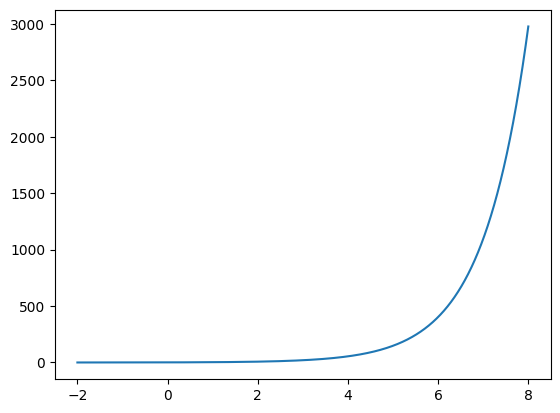

In [92]:
xs = torch.arange(-2, 8, 0.001)
ys = xs.exp()
plt.plot(xs, ys)

Now we have these normalised counts and we can calculate the probability using softmax as follows.The probability distribution produced by softmax function is similar to the above diagram but within a limited range.

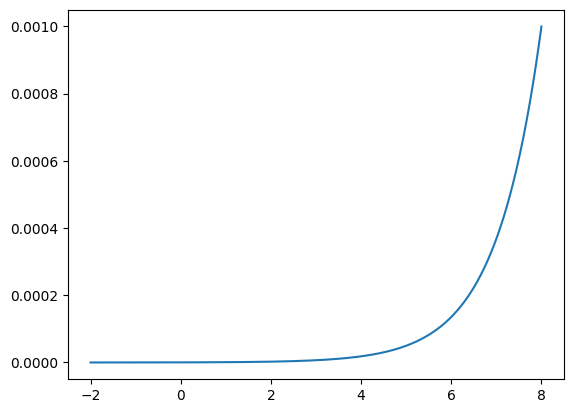

In [35]:
xs = torch.arange(-2, 8, 0.001)
ys = F.softmax(xs, dim=0)
plt.plot(xs, ys)

In [ ]:
# Here we should notice that the curve is flat in the beginning and 
# explodes as values gets higher. Therefore the gradient too will 
# vanish and explode when values in the inputs are very high or low.
# But the most interesting fact is that the gradient value will be exactly is equal to
# the value of softmax function. This is because the derivative of e^x is the same.